In [2]:
from email.mime import image
from math import ceil
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
"""convert image from color to grayscale"""
# img = mpimg.imread('E:/test_codes/t1_noise/lena_gray.png')
img = mpimg.imread('images/lena_gray.png')
rgb_weights = [0.2989, 0.5870, 0.1140]

img = np.dot(img[...,:3], rgb_weights)

In [4]:

def uniform_noise (main_image: np.ndarray, snr: float):
    """
    uniform Noise
    main_image: Image to add noise to
    snr: Signal to Noise Ratio
    
    return: Noisy Image
    """
    # make a copy of image to add noise on it
    image = np.copy(main_image)
    
    # Generate uniform noise
    # noise = np.random.uniform(-255, 255, size=image.size) 
    
    dimensions = len(main_image.shape)
    # print (dimensions)
    
    if dimensions == 3 :
        nRows, nCols, _= main_image.shape
        size = main_image.size
        noise = np.random.uniform( 0 , 255, size) 
        element = 0

        for row in range(nRows):
            for col in range(nCols): 
                for dim in range (dimensions):  # dimensions would be 1 in case of grey scale and 3 in case of RGB
                    pixel_val = main_image[row, col, dim]
                    
                    image [row][col][dim] = pixel_val * snr + noise[element] / 255 * (1-snr)
                    
                    # image [row, col, dim] = pixel_val * snr + noise[element] * (1-snr) 
                    # image [row, col, dim] = pixel_val + noise[element] /255
                    element = element + 1

    elif dimensions == 2 :
        
        nRows, nCols= main_image.shape
        size = nRows*nCols
        noise = np.random.uniform(0 , 255,size ) 
        
        element = 0

        for row in range(nRows):
            for col in range(nCols): 
                
                pixel_val = main_image[row][col]
                image [row][col] = pixel_val * snr + noise[element] / 255 * (1-snr)
                # image [row, col] = pixel_val * snr + noise[element] * (1-snr) 
                # image [row, col] = pixel_val + noise[element] /255
                element = element + 1

    return image


In [5]:

def gaussian_noise (main_image: np.ndarray,sigma: float, snr: float):
    """
    Gaussian Noise
    main_image: Image to add noise to
    snr: Signal to Noise Ratio
    sigma: Noise Variance
    
    return: Noisy Image
    """
    # make a copy of image to add noise on it
    image = np.copy(main_image)
    
    dimensions = len(main_image.shape)
    
    # Generate Gaussian noise
    gauss = []
    element = 0
    
    for _ in range(main_image.size):
        # gauss.append(random.gauss(0, sigma))
        gauss.append(np.random.normal(0, sigma))
        
        
    if dimensions == 3 : # in case of RGB image
        nRows, nCols, _= main_image.shape
        for row in range(nRows):
            for col in range(nCols): 
                for dim in range (dimensions):
                    pixel_val = main_image[row, col, dim]
                    image [row, col, dim] = pixel_val * snr + gauss[element]* (1-snr)
                    element = element + 1
                    
    elif dimensions == 2: # in case of gray scale image
        nRows, nCols= main_image.shape
        
        for row in range(nRows):
            for col in range(nCols): 
                    pixel_val = main_image[row][col] 
                    image[row][col] = pixel_val * snr + gauss[element]* (1-snr) 
                    element = element + 1
    return image
  

In [6]:
            
def salt_and_pepper_noise (main_image: np.ndarray, snr: float):
    """
    Salt and Pepper noise
    main_image: Image to add noise to
    snr: Signal to Noise Ratio
    
    return: Noisy Image
    """
    # make a copy of image to add noise on it
    image = np.copy(main_image)
    # image = main_image 

    # random_num = random.randint(0,255)
 
    dimensions = len(image.shape) 
    
    if dimensions == 2:
        nRows, nCols= image.shape
        
    elif dimensions == 3:
        nRows, nCols, _= image.shape
        
    # number_of_pixels = ceil(nRows * nCols * dimensions * (100 - snr)/100)
    number_of_pixels = ceil(nRows * nCols * dimensions * (1-snr)/ 10 )
    
    # Randomly pick some pixels in the image for coloring them black
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, nRows - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, nCols - 1)
         
        # Color that pixel to black
        image[y_coord][x_coord] = 0
        
    # Randomly pick some pixels in the image for coloring them white    
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, nRows - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, nCols - 1)
         
        # Color that pixel to black
        image[y_coord][x_coord] = 1
 
    # prob = 0.01
    # threshod = 1 - prob
    # for row in range(nRows):
    #     for col in range(nCols):  # dimensions would be 1 in case of grey scale and 3 in case of RGB
    #         # for dim in range (dimensions):
    #             rand = np.random.random() 
    #             if rand < prob:
    #                 image [row][col] = 0
    #             elif rand > threshod:
    #                 image [row][col] = 255
        
    return image


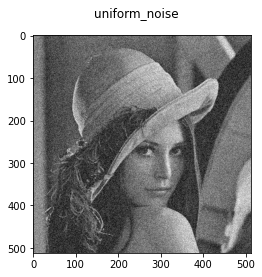

In [7]:

plt.imshow( uniform_noise(img, 0.65), cmap=plt.get_cmap("gray"))
plt.suptitle("uniform_noise") 
plt.show()    
  

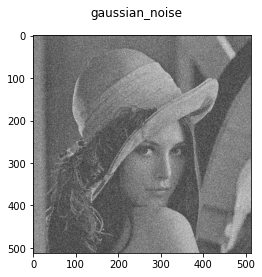

In [8]:

plt.imshow( gaussian_noise(img, 1, 0.85), cmap=plt.get_cmap("gray"))
plt.suptitle("gaussian_noise")
plt.show() 


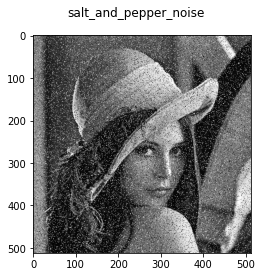

In [9]:

plt.imshow(salt_and_pepper_noise(img,0.6), cmap=plt.get_cmap("gray"))
plt.suptitle("salt_and_pepper_noise")
plt.show()   
